# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [0]:
# Import
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# Plot Example
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.198973507 W= 0.44487345 b= -0.6033624
Epoch: 0100 cost= 0.184878916 W= 0.43325916 b= -0.5198104
Epoch: 0150 cost= 0.172411919 W= 0.42233562 b= -0.4412277
Epoch: 0200 cost= 0.161384717 W= 0.41206187 b= -0.3673189
Epoch: 0250 cost= 0.151631072 W= 0.40239912 b= -0.2978054
Epoch: 0300 cost= 0.143003926 W= 0.39331102 b= -0.23242666
Epoch: 0350 cost= 0.135373205 W= 0.38476348 b= -0.17093611
Epoch: 0400 cost= 0.128623873 W= 0.37672433 b= -0.113102876
Epoch: 0450 cost= 0.122654170 W= 0.36916324 b= -0.058709156
Epoch: 0500 cost= 0.117374077 W= 0.36205184 b= -0.007550418
Epoch: 0550 cost= 0.112703979 W= 0.3553634 b= 0.040565636
Epoch: 0600 cost= 0.108573399 W= 0.34907278 b= 0.085820004
Epoch: 0650 cost= 0.104920089 W= 0.34315628 b= 0.12838288
Epoch: 0700 cost= 0.101688869 W= 0.3375917 b= 0.16841431
Epoch: 0750 cost= 0.098831058 W= 0.33235803 b= 0.2060651
Epoch: 0800 cost= 0.096303530 W= 0.32743564 b= 0.24147643
Epoch: 0850 cost= 0.094068095 W= 0.322806 b= 0.27478173
Epoch: 09

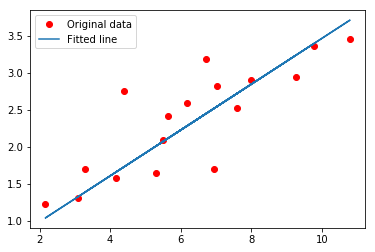

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

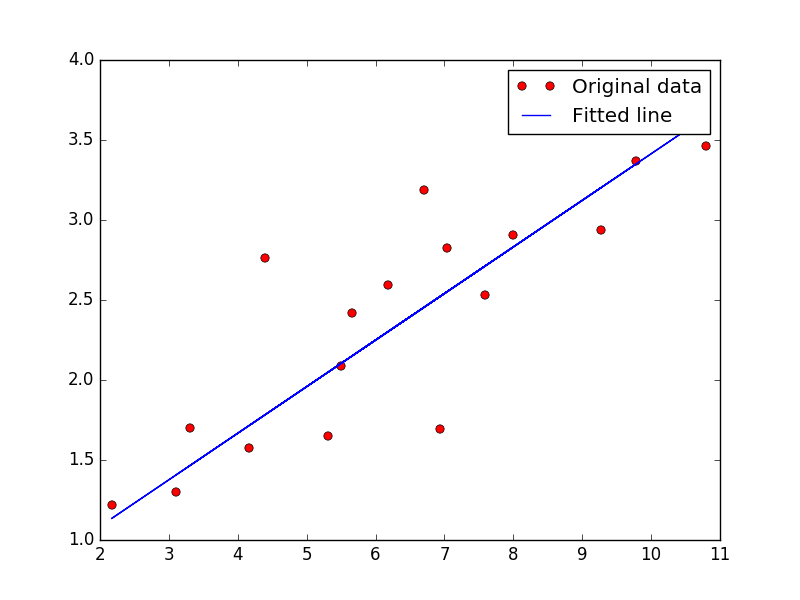

In [0]:
# Regression result